<a href="https://colab.research.google.com/github/jaybipinsosa/Diabetes-Disease-Prediction/blob/main/Diabetes_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
# Importing data manipulation libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Importing warning library
import warnings
warnings.filterwarnings('ignore')

# Importing models from Sickit-Learn
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Importing metrics
from sklearn.metrics import classification_report,confusion_matrix,auc,accuracy_score,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score

# Importing additional tools
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Models:

1. SVM:

1. Using Sigmoid Kernal

Model Evaluation on Test Data

In [ ]:
sigmoid_svm_model = svm.SVC(kernel='sigmoid')
#training the support vector Machine Classifier
sigmoid_svm_model.fit(X_train, Y_train)
Y_pred = sigmoid_svm_model.predict(X_test)
print("--------------------------Model Evaluation on Test Data----------------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
print()
print('Classification Report:\n',classification_report(Y_test,Y_pred))

--------------------------Model Evaluation on Test Data----------------------------------

Confusion Matrix:
 [[76 24]
 [49  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.76      0.68       100
           1       0.17      0.09      0.12        54

    accuracy                           0.53       154
   macro avg       0.39      0.43      0.40       154
weighted avg       0.46      0.53      0.48       154



Model Evaluation on Train Data

In [ ]:
Y_pred_train = sigmoid_svm_model.predict(X_train)
print("--------------------------Model Evaluation on Train Data----------------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_train,Y_pred_train))
print()
print('Classification Report:\n',classification_report(Y_train,Y_pred_train))

--------------------------Model Evaluation on Train Data----------------------------------

Confusion Matrix:
 [[283 117]
 [193  21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.71      0.65       400
           1       0.15      0.10      0.12       214

    accuracy                           0.50       614
   macro avg       0.37      0.40      0.38       614
weighted avg       0.44      0.50      0.46       614



Accuracy Score

In [ ]:
sigmoid_svm_model_test_accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy on Test Data:{sigmoid_svm_model_test_accuracy:.2f}")
sigmoid_svm_model_train_accuracy = accuracy_score(Y_train,Y_pred_train)
print(f"Accuracy on Train Data:{sigmoid_svm_model_train_accuracy:.2f}")

Accuracy on Test Data:0.53
Accuracy on Train Data:0.50


2. Using Polynomial Kernal

In [ ]:
poly_svm_model = svm.SVC(kernel='poly')
#training the support vector Machine Classifier
poly_svm_model.fit(X_train, Y_train)
Y_pred = poly_svm_model.predict(X_test)
print("--------------------------Model Evaluation on Test Data----------------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
print()
print('Classification Report:\n',classification_report(Y_test,Y_pred))

--------------------------Model Evaluation on Test Data----------------------------------

Confusion Matrix:
 [[95  5]
 [32 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       100
           1       0.81      0.41      0.54        54

    accuracy                           0.76       154
   macro avg       0.78      0.68      0.69       154
weighted avg       0.77      0.76      0.73       154



Model Evaluation Train Data

In [ ]:
Y_pred_train = poly_svm_model.predict(X_train)
print("--------------------------Model Evaluation on Train Data----------------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_train,Y_pred_train))
print()
print('Classification Report:\n',classification_report(Y_train,Y_pred_train))

--------------------------Model Evaluation on Train Data----------------------------------

Confusion Matrix:
 [[369  31]
 [107 107]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       400
           1       0.78      0.50      0.61       214

    accuracy                           0.78       614
   macro avg       0.78      0.71      0.73       614
weighted avg       0.78      0.78      0.76       614



Accuracy Score

In [ ]:
poly_svm_model_test_accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy on Test Data:{poly_svm_model_test_accuracy:.2f}")
poly_svm_model_train_accuracy = accuracy_score(Y_train,Y_pred_train)
print(f"Accuracy on Train Data:{poly_svm_model_train_accuracy:.2f}")

Accuracy on Test Data:0.76
Accuracy on Train Data:0.78


3. Using Linear Kernal

In [ ]:
linear_svm_model = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
linear_svm_model.fit(X_train, Y_train)
Y_pred = linear_svm_model.predict(X_test)
print("--------------------------Model Evaluation on Test Data----------------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
print()
print('Classification Report:\n',classification_report(Y_test,Y_pred))

--------------------------Model Evaluation on Test Data----------------------------------

Confusion Matrix:
 [[91  9]
 [26 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



Model Evaluation on Train Data

In [ ]:
Y_pred_train = linear_svm_model.predict(X_train)
print("-----------------Model Evaluation on Train Data------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_train,Y_pred_train))
print()
print('Classification Report:\n',classification_report(Y_train,Y_pred_train))

-----------------Model Evaluation on Train Data------------------------

Confusion Matrix:
 [[355  45]
 [ 88 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.74      0.59      0.65       214

    accuracy                           0.78       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.78      0.78       614



Accuracy Score

In [ ]:
linear_svm_model_test_accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy on Test Data:{linear_svm_model_test_accuracy:.2f}")
linear_svm_model_train_accuracy = accuracy_score(Y_train,Y_pred_train)
print(f"Accuracy on Train Data:{linear_svm_model_train_accuracy:.2f}")

Accuracy on Test Data:0.77
Accuracy on Train Data:0.78


Comparing Sigmoid, Poly and Linear Kernels Based on the Accuracy Score

In [ ]:
# Create dictionaries to store train and test accuracies for each model
train_accuracies = {}
test_accuracies = {}

# Store the accuracies in the dictionaries
train_accuracies[sigmoid_svm_model] = sigmoid_svm_model_test_accuracy
test_accuracies[sigmoid_svm_model] = sigmoid_svm_model_train_accuracy

train_accuracies[poly_svm_model] = poly_svm_model_test_accuracy
test_accuracies[poly_svm_model] =  poly_svm_model_train_accuracy

train_accuracies[linear_svm_model] = linear_svm_model_test_accuracy
test_accuracies[linear_svm_model] = linear_svm_model_train_accuracy

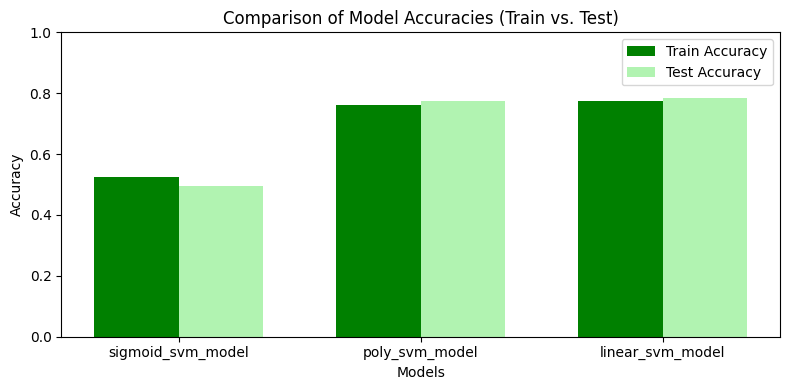

+-------------------+------------------+-----------------+
| Model             |   Train Accuracy |   Test Accuracy |
+===================+==================+=================+
| sigmoid_svm_model |         0.495114 |        0.525974 |
+-------------------+------------------+-----------------+
| poly_svm_model    |         0.775244 |        0.75974  |
+-------------------+------------------+-----------------+
| linear_svm_model  |         0.783388 |        0.772727 |
+-------------------+------------------+-----------------+


In [ ]:
# Convert model names to strings
model_names = ['sigmoid_svm_model', 'poly_svm_model', 'linear_svm_model']

# Get the number of models
num_models = len(model_names)

# Create an array of indices for positioning the bars
indices = np.arange(num_models)

# Set the width of each bar
bar_width = 0.35

# Create bar plots to visualize the accuracies
plt.figure(figsize=(8,4))

# Plot train accuracies
plt.bar(indices, train_accuracies.values(), bar_width, label='Train Accuracy', color='green')

# Plot test accuracies (shifted to the right by bar_width)
plt.bar(indices + bar_width, test_accuracies.values(), bar_width, label='Test Accuracy', alpha=0.7, color='lightgreen')

# Set the x-axis ticks and labels
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies (Train vs. Test)')
plt.xticks(indices + bar_width / 2, model_names)
plt.ylim(0, 1.0)  # Set the y-axis limit to 0-1 for accuracy values
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Tabular Format
# test and train accuracy values
test_accuracies = [sigmoid_svm_model_test_accuracy, poly_svm_model_test_accuracy, linear_svm_model_test_accuracy]
train_accuracies = [sigmoid_svm_model_train_accuracy, poly_svm_model_train_accuracy, linear_svm_model_train_accuracy]

# Create a table with the data
table_data = []
for model_name, train_acc, test_acc in zip(model_names, train_accuracies, test_accuracies):
    table_data.append([model_name, train_acc, test_acc])

# Print the table
table_headers = ["Model", "Train Accuracy", "Test Accuracy"]
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))



In comparing the performance of different SVM models, it is evident that the "linear_svm_model" outperforms the "sigmoid_svm_model" and "poly_svm_model" in terms of both train accuracy and test accuracy. With a train accuracy of approximately 78.34% and a test accuracy of approximately 77.27%, the linear SVM model demonstrates superior predictive capability compared to the other models.

Make a Predictive Model Using Linear Kernel

In [ ]:
# input_data = (5,166,72,19,175,25.8,0.587,15)
input_data = (0,100,130,20,175,25.8,0.587,15)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = linear_svm_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(linear_svm_model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [ ]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


2. Logistic Regression

Model Evaluation on Test Data

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)
Y_pred = lg_model.predict(X_test)
print("-----------------Model Evaluation on Test Data------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
print()
print('Classification Report:\n',classification_report(Y_test,Y_pred))

-----------------Model Evaluation on Test Data------------------------

Confusion Matrix:
 [[88 12]
 [26 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



Model Evaluation on Train Data

In [ ]:
Y_pred_train = lg_model.predict(X_train)
print("-----------------Model Evaluation on Train Data------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_train,Y_pred_train))
print()
print('Classification Report:\n',classification_report(Y_train,Y_pred_train))

-----------------Model Evaluation on Train Data------------------------

Confusion Matrix:
 [[357  43]
 [ 89 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.74      0.58      0.65       214

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614





>Accuracy Score



In [ ]:
lg_model_test_accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy on Test Data:{lg_model_test_accuracy:.2f}")
lg_model_train_accuracy = accuracy_score(Y_train,Y_pred_train)
print(f"Accuracy on Train Data:{lg_model_train_accuracy:.2f}")

Accuracy on Test Data:0.75
Accuracy on Train Data:0.79


3. Random Forest Classifier:

Model Evaluation on Test Data



In [ ]:
rt_model = RandomForestClassifier()
rt_model.fit(X_train, Y_train)
Y_pred = rt_model.predict(X_test)
print("--------------------------Model Evaluation on Test Data----------------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
print()
print('Classification Report:\n',classification_report(Y_test,Y_pred))

--------------------------Model Evaluation on Test Data----------------------------------

Confusion Matrix:
 [[87 13]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.68      0.50      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.69       154
weighted avg       0.73      0.74      0.73       154



Model Evaluation on Train Data

In [ ]:
Y_pred_train = rt_model.predict(X_train)
print("--------------------------Model Evaluation on Train Data----------------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_train,Y_pred_train))
print()
print('Classification Report:\n',classification_report(Y_train,Y_pred_train))

--------------------------Model Evaluation on Train Data----------------------------------

Confusion Matrix:
 [[400   0]
 [  0 214]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



Accuracy Score

In [ ]:
rt_model_test_accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy on Test Data:{rt_model_test_accuracy:.2f}")
rt_model_train_accuracy = accuracy_score(Y_train,Y_pred_train)
print(f"Accuracy on Train Data:{rt_model_train_accuracy:.2f}")

Accuracy on Test Data:0.74
Accuracy on Train Data:1.00


4. Naive Bayes:

Model Evaluation on Test Data

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
Y_pred = nb_model.predict(X_test)
print("--------------------------Model Evaluation on Test Data----------------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_test,Y_pred))
print()
print('Classification Report:\n',classification_report(Y_test,Y_pred))

--------------------------Model Evaluation on Test Data----------------------------------

Confusion Matrix:
 [[88 12]
 [23 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



Model Evaluation on Train Data

In [ ]:
Y_pred_train = nb_model.predict(X_train)
print("--------------------------Model Evaluation on Train Data----------------------------------")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_train,Y_pred_train))
print()
print('Classification Report:\n',classification_report(Y_train,Y_pred_train))

--------------------------Model Evaluation on Train Data----------------------------------

Confusion Matrix:
 [[333  67]
 [ 83 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       400
           1       0.66      0.61      0.64       214

    accuracy                           0.76       614
   macro avg       0.73      0.72      0.73       614
weighted avg       0.75      0.76      0.75       614



Accuracy Score

In [ ]:
nb_model_test_accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy on Test Data:{nb_model_test_accuracy:.2f}")
nb_model_train_accuracy = accuracy_score(Y_train,Y_pred_train)
print(f"Accuracy on Train Data:{nb_model_train_accuracy:.2f}")

Accuracy on Test Data:0.77
Accuracy on Train Data:0.76


Comparing SVM, Logistic, Random Forest and Naive Bayes Classifiers Based on the Accuracy Score

In [ ]:
# Create dictionaries to store train and test accuracies for each model
train_accuracies = {}
test_accuracies = {}

# Store the accuracies in the dictionaries
train_accuracies[linear_svm_model] = linear_svm_model_test_accuracy
test_accuracies[linear_svm_model] = linear_svm_model_train_accuracy

train_accuracies[lg_model] = lg_model_test_accuracy
test_accuracies[lg_model] =  lg_model_train_accuracy

train_accuracies[rt_model] = rt_model_test_accuracy
test_accuracies[rt_model] = rt_model_train_accuracy

train_accuracies[nb_model] = nb_model_test_accuracy
test_accuracies[nb_model] = nb_model_train_accuracy

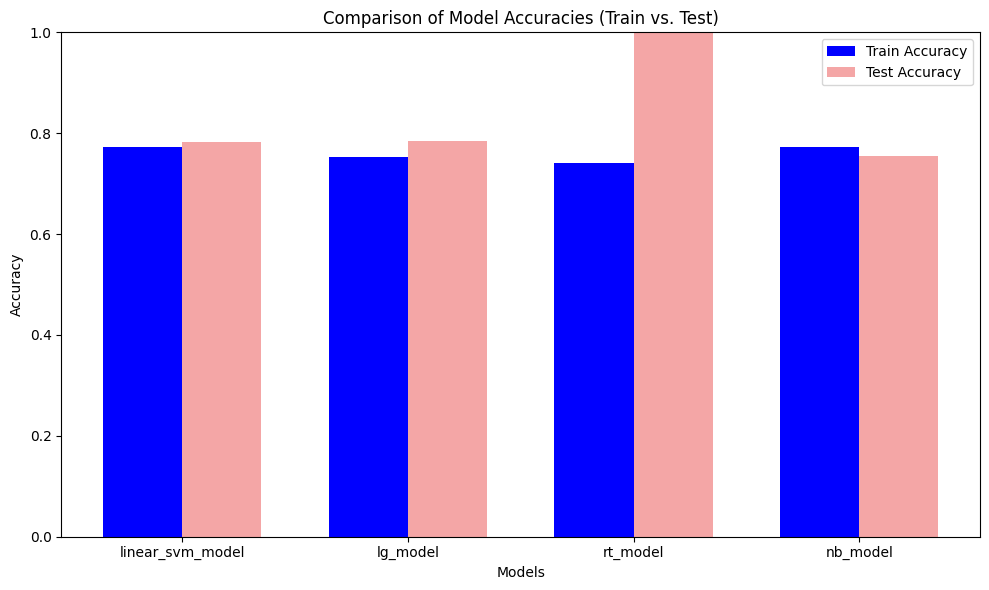

+------------------+------------------+-----------------+
| Model            |   Train Accuracy |   Test Accuracy |
+==================+==================+=================+
| linear_svm_model |         0.783388 |        0.772727 |
+------------------+------------------+-----------------+
| lg_model         |         0.785016 |        0.753247 |
+------------------+------------------+-----------------+
| rt_model         |         1        |        0.74026  |
+------------------+------------------+-----------------+
| nb_model         |         0.7557   |        0.772727 |
+------------------+------------------+-----------------+


In [ ]:
# Convert model names to strings
model_names = ['linear_svm_model', 'lg_model', 'rt_model', 'nb_model']

# Get the number of models
num_models = len(model_names)

# Create an array of indices for positioning the bars
indices = np.arange(num_models)

# Set the width of each bar
bar_width = 0.35

# Create bar plots to visualize the accuracies
plt.figure(figsize=(10,6))

# Plot train accuracies
plt.bar(indices, train_accuracies.values(), bar_width, label='Train Accuracy', color='blue')

# Plot test accuracies (shifted to the right by bar_width)
plt.bar(indices + bar_width, test_accuracies.values(), bar_width, label='Test Accuracy', alpha=0.7, color='lightcoral')

# Set the x-axis ticks and labels
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies (Train vs. Test)')
plt.xticks(indices + bar_width / 2, model_names)
plt.ylim(0, 1.0)  # Set the y-axis limit to 0-1 for accuracy values
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Tabular Format
# test and train accuracy values
test_accuracies = [linear_svm_model_test_accuracy, lg_model_test_accuracy, rt_model_test_accuracy, nb_model_test_accuracy]
train_accuracies = [linear_svm_model_train_accuracy, lg_model_train_accuracy, rt_model_train_accuracy, nb_model_train_accuracy]

# Create a table with the data
table_data = []
for model_name, train_acc, test_acc in zip(model_names, train_accuracies, test_accuracies):
    table_data.append([model_name, train_acc, test_acc])

# Print the table
table_headers = ["Model", "Train Accuracy", "Test Accuracy"]
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))



In summary, the SVM classifier and Naive Bayes models appear to be more suitable for this classification task due to their relatively consistent and balanced performance on both training and testing data. The logistic regression model, while still reasonable, shows a slightly higher degree of overfitting. However, the random tree model appears to overfit the training data significantly, which may require further tuning or regularization to improve its generalization ability.